In [35]:
#!pip install pandas
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Rruhid/data/refs/heads/master/homicide_by_countries.csv')

df.shape
df.isnull().sum()

df['Rate'] = df['Rate'].astype(int)

df.dtypes

df1 = df.sort_values(by ='Count', ascending = False)

df1


,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
112,Monaco,Europe,Western Europe,0,0,2015
84,Isle of Man,Europe,Northern Europe,0,0,2016
151,San Marino,Europe,Southern Europe,0,0,2011


In [37]:
df1 =  df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


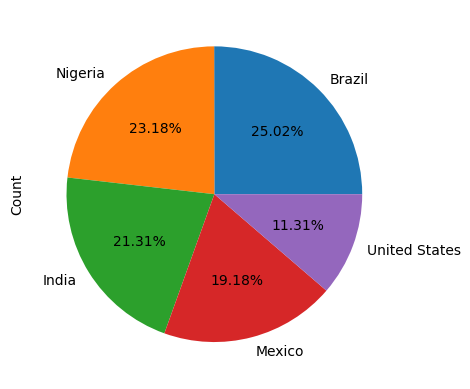

In [49]:
df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [54]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

,Count
Region,
Americas,153597
Asia,105552
Africa,99481
Europe,19869
Oceania,347


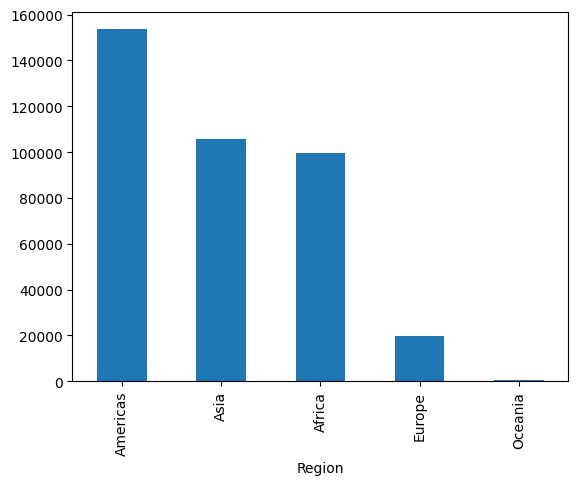

In [56]:
df2.plot(kind = 'bar')
plt.show()

In [57]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

,Count
Subregion,
South America,78872
Southern Asia,58631
Central America,47371
Western Africa,46318
South-Eastern Asia,25314
Eastern Africa,23669
Northern America,22317
Southern Africa,21479
Eastern Europe,14604


In [58]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Southern Asia'),
  Text(2, 0, 'Central America'),
  Text(3, 0, 'Western Africa'),
  Text(4, 0, 'South-Eastern Asia'),
  Text(5, 0, 'Eastern Africa'),
  Text(6, 0, 'Northern America'),
  Text(7, 0, 'Southern Africa'),
  Text(8, 0, 'Eastern Europe'),
  Text(9, 0, 'Western Asia'),
  Text(10, 0, 'Eastern Asia'),
  Text(11, 0, 'Northern Africa'),
  Text(12, 0, 'Caribbean'),
  Text(13, 0, 'Middle Africa'),
  Text(14, 0, 'Northern Europe'),
  Text(15, 0, 'Western Europe'),
  Text(16, 0, 'Central Asia'),
  Text(17, 0, 'Southern Europe'),
  Text(18, 0, 'Australia, New Zealand')])

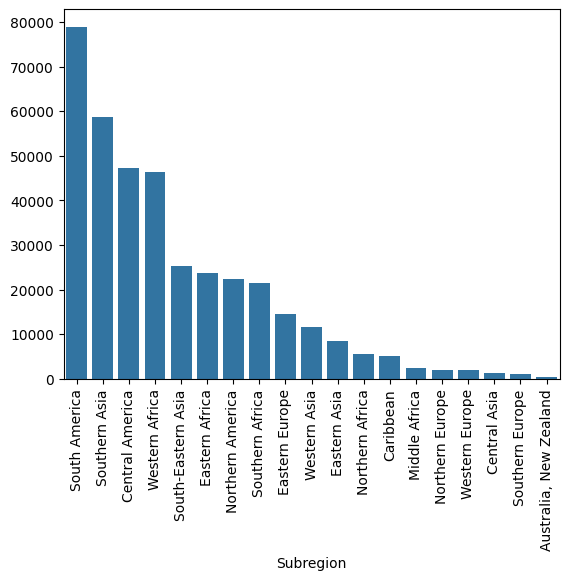

In [104]:
sns.barplot(x = df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
#plt.xlabel = None

In [70]:
df.Location.value_counts()

,count
Location,
Afghanistan,1
Albania,1
Algeria,1
Andorra,1
Angola,1
...,...
Venezuela,1
Vietnam,1
Yemen,1


In [71]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [75]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe') ]

In [79]:
df4 = df4[df4['Year'] > 2016 ][['Region', 'Year', 'Count']]
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [87]:
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [89]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [95]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

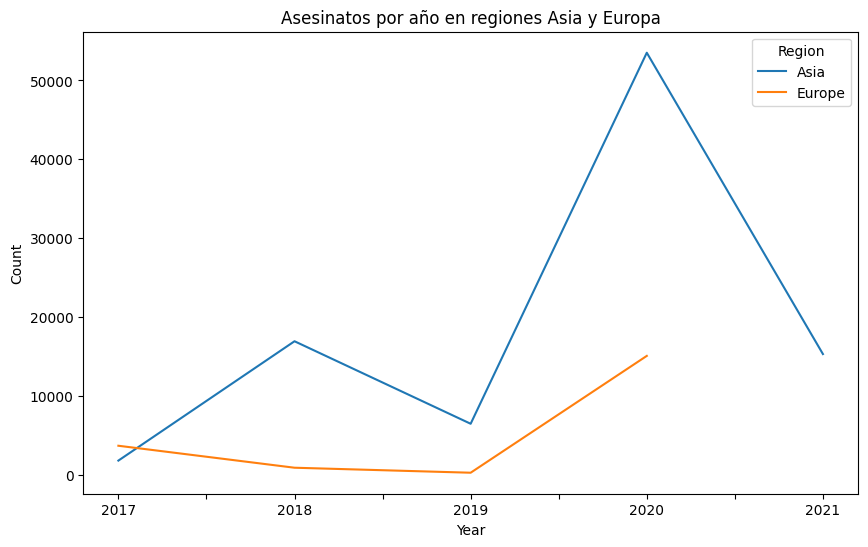

In [106]:
df_unstacked.plot(kind = 'line', figsize = (10,6))
#plt.xlabel('Año')
plt.ylabel('Count')
plt.title('Asesinatos por año en regiones Asia y Europa')
plt.show()

In [108]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df5

,Rate
Year,
2020,564
2019,153
2012,113
2016,76
2018,64
2015,55
2014,52
2009,36
2021,28


<Axes: xlabel='Year'>

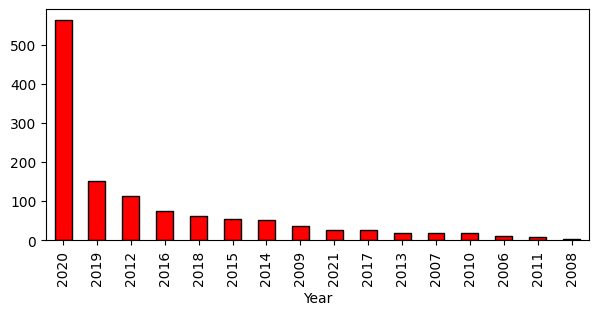

In [109]:
df5.plot(kind = 'bar', figsize = (7,3), color = 'red', edgecolor = 'black')

In [120]:
df6 = df[['Year', 'Region', 'Count']]
df6 = df6.groupby(['Year', 'Region']).sum().sort_values(by = 'Year', ascending = False)
df6


Count
Year Region          
2021 Asia       15299
2020 Oceania      221
     Europe     15066
     Americas  134784
     Africa     28460
     Asia       53516
2019 Asia        6458
     Americas    4276
     Africa     44210
     Europe       249
     Oceania      126
2018 Americas   13793
     Asia       16923
     Europe       883
2017 Asia        1787
     Africa      1467
     Europe      3670
2016 Europe         0
     Americas     608
     Asia         627
     Africa      4987
2015 Asia         241
     Africa      2206
     Europe         0
2014 Americas      13
     Asia        3029
2013 Asia        5782
2012 Africa     15264
     Americas      53
     Asia          61
2011 Africa       855
     Asia        1626
     Europe         0
2010 Africa       303
     Europe         1
2009 Africa        27
     Americas      42
2008 Africa      1702
2007 Americas      26
2006 Asia         203
     Americas       2

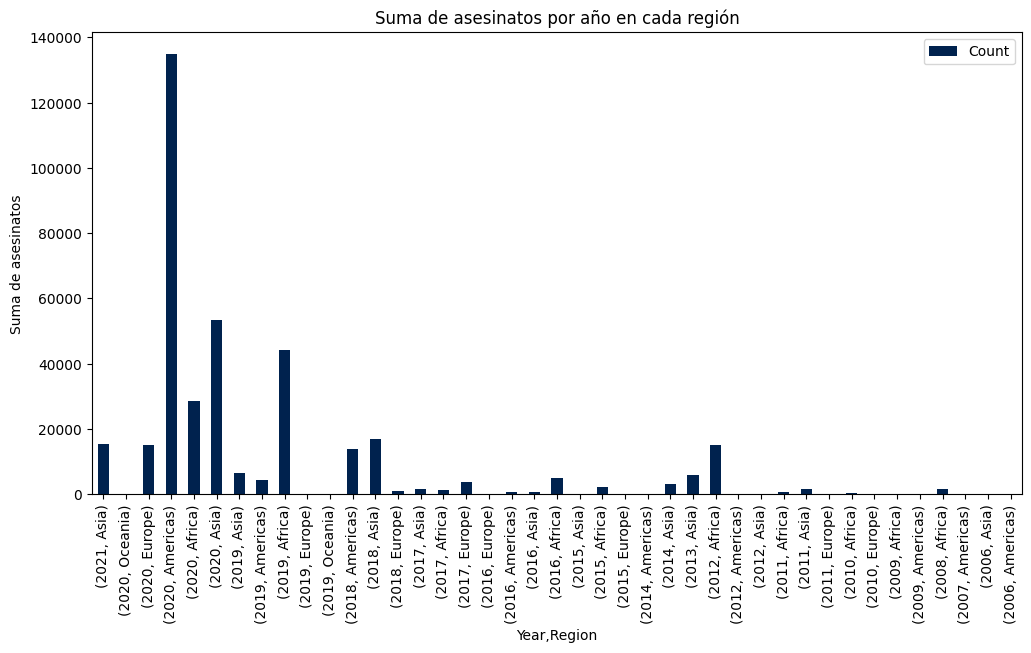

In [128]:
df6.plot(kind = 'bar', figsize = (12,6), colormap = 'cividis')
plt.ylabel('Suma de asesinatos')
plt.title('Suma de asesinatos por año en cada región')
plt.show()

In [130]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)
df7

,Count
Subregion,
Southern Asia,6514.56
South America,6067.08
Central America,5921.38
Northern America,4463.40
Southern Africa,4295.80
Western Africa,4210.73
South-Eastern Asia,2531.40
Eastern Africa,1577.93
Eastern Europe,1460.40


In [131]:
data = {
    'Category': df7.index,
    'Values': df7.values,
    'Info': df7.values
}

df = pd.DataFrame(data)
df

,Category,Values,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [135]:
fig = px.treemap(df, path = ['Category'], values = 'Values', title = 'Treemap')
fig.update_traces(hovertemplate = 'Category: %{label}<br>Values:%{value}')
fig.show()